# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [98]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

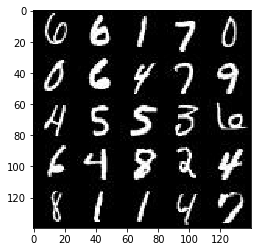

In [99]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [100]:
# looking into the values range
import numpy as np
print(np.min(mnist_images), np.max(mnist_images))

0.0 255.0


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

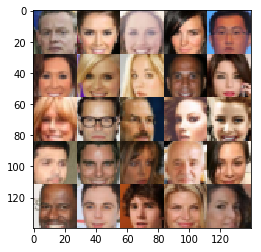

In [101]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
celeb_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(celeb_images, 'RGB'))

In [102]:
# looking into the values range
print(np.min(celeb_images), np.max(celeb_images))

0.0 255.0


In [103]:
# looking into the values range -- noting [-0.5, +0.5] range for batched images
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
i=0
for batch_images in mnist_dataset.get_batches(1):
    print(batch_images.min(), batch_images.max())
    i = i + 1
    if i> 10:
        break

-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5


## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [104]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [105]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    # straightforward input from the assignment above 
    inputs_real = tf.placeholder(tf.float32, (None, image_width, 
                                 image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [106]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.15 # an alpha for a parametric relu
    
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # using 4 layers network
        # increasing depth by 2 an reducing height and width by 2 -- as in the class videos
        #
        # added dropouts twice following 
        # https://github.com/soumith/ganhacks
        
        # layers
        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'same',
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        relu1 = tf.maximum(alpha*conv1, conv1)
        relu1dp = tf.layers.dropout(relu1, rate=0.1)
        
        conv2 = tf.layers.conv2d(relu1dp, 128, 5, 2, 'same',
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv2bn = tf.layers.batch_normalization(conv2, training=True)
        relu2 = tf.maximum(alpha*conv2bn, conv2bn)
        relu2dp = tf.layers.dropout(relu2, rate=0.2)
        
        conv3 = tf.layers.conv2d(relu2dp, 256, 5, 2, 'same',
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv3bn = tf.layers.batch_normalization(conv3, training=True)
        relu3 = tf.maximum(alpha*conv3bn, conv3bn)
        relu3dp = tf.layers.dropout(relu3, rate=0.3)

        conv4 = tf.layers.conv2d(relu3dp, 512, 5, 2, 'same')
        conv4bn = tf.layers.batch_normalization(conv4, training=True)
        relu4 = tf.maximum(alpha*conv4bn, conv4bn)

        # flatten
        flat = tf.contrib.layers.flatten(relu3)
        fc = tf.layers.dense(flat, 1)
        logits = tf.layers.dropout(fc, rate=0.2)
            
        # logits
        # logits = tf.layers.dropout(tf.layers.dense(flat, 1), rate=0.2)

        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [107]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.15
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        # Similar to the class' solution except of resizing the output at the end as in 
        # https://medium.com/@Miqubel/deep-learning-nd-face-generator-fa92ddbb8c4a
        # also rescaling by dividing in half -- making the output same as the real data 
        
        # layers
        fc1 = tf.layers.dense(z, 7 * 7 * 512)
        fc1 = tf.reshape(fc1, (-1, 7, 7, 512)) #standard conv stack
        fc1 = tf.layers.batch_normalization(fc1, training=is_train)
        fc1 = tf.maximum(alpha * fc1, fc1)
        
        dconv1 = tf.layers.conv2d_transpose(fc1, 256, 3, 2, 'same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        dconv1 = tf.layers.batch_normalization(dconv1, training=is_train)
        dconv1 = tf.maximum(alpha * dconv1, dconv1)
        
        dconv2 = tf.layers.conv2d_transpose(dconv1, 128, 3, 2, 'same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        dconv2 = tf.layers.batch_normalization(dconv2, training=is_train)
        dconv2 = tf.maximum(alpha * dconv2, dconv2)

        dconv3 = tf.layers.conv2d_transpose(dconv2, 64, 3, 1, 'same')
        dconv3 = tf.layers.batch_normalization(dconv3, training=is_train)
        dconv3 = tf.maximum(alpha * dconv3, dconv3)

        drop1 = tf.nn.dropout(dconv3, keep_prob=0.8)
        
        # logits
        logits = tf.layers.conv2d_transpose(drop1, out_channel_dim, 5, strides=1, padding='same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        drop2 = tf.nn.dropout(logits, keep_prob=0.9)
        logits = tf.image.resize_images(logits, (28, 28))

        # outs
        out = tf.tanh(logits) / 2 # make sure it's like images between -05 and 05
                
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [108]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    label_smooth = 0.2 # label smoothing
    
    # gen model
    g_model = generator(input_z, out_channel_dim)
    
    # discr models
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    # losses
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
   
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * (1-label_smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [109]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # discriminator and generator variables
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [110]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [111]:
# the nice helper plotter utility from
# https://medium.com/@Miqubel/deep-learning-nd-face-generator-fa92ddbb8c4a
# a little adjusted for the screen
#
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)

def plot(loss_d, loss_g):
    fig, ax = plt.subplots()
    plt.plot(loss_d, label='Discriminator', alpha=0.5)
    plt.plot(loss_g, label='Generator', alpha=0.5)
    plt.title("Training Losses")
    plt.legend()

In [112]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    width = data_shape[1]
    height = data_shape[2]
    channel_dim = data_shape[3]
        
    input_real, input_z, lr = model_inputs(width, height, channel_dim, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    loss_d, loss_g = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps = steps + 1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    loss_d.append(train_loss_d)
                    loss_g.append(train_loss_g)

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, channel_dim, data_image_mode)
                
            
        print("*************")
        show_generator_output(sess, 16, input_z, channel_dim, data_image_mode)
        plot(loss_d, loss_g)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.1887... Generator Loss: 3.1605
Epoch 1/2... Discriminator Loss: 1.8021... Generator Loss: 2.9637
Epoch 1/2... Discriminator Loss: 2.1481... Generator Loss: 3.2891
Epoch 1/2... Discriminator Loss: 1.6621... Generator Loss: 2.1440
Epoch 1/2... Discriminator Loss: 1.4946... Generator Loss: 1.8642
Epoch 1/2... Discriminator Loss: 1.3454... Generator Loss: 1.5063
Epoch 1/2... Discriminator Loss: 1.2718... Generator Loss: 1.2686
Epoch 1/2... Discriminator Loss: 1.6627... Generator Loss: 0.4474
Epoch 1/2... Discriminator Loss: 1.2222... Generator Loss: 1.0354
Epoch 1/2... Discriminator Loss: 1.2304... Generator Loss: 1.5239


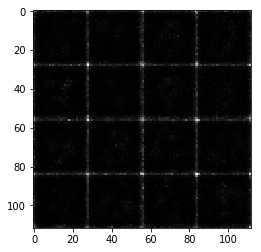

Epoch 1/2... Discriminator Loss: 1.2091... Generator Loss: 0.8456
Epoch 1/2... Discriminator Loss: 1.1400... Generator Loss: 1.0492
Epoch 1/2... Discriminator Loss: 1.1613... Generator Loss: 1.4942
Epoch 1/2... Discriminator Loss: 1.1290... Generator Loss: 0.9217
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.7383
Epoch 1/2... Discriminator Loss: 1.3133... Generator Loss: 0.6849
Epoch 1/2... Discriminator Loss: 1.2905... Generator Loss: 0.6899
Epoch 1/2... Discriminator Loss: 1.0221... Generator Loss: 1.2664
Epoch 1/2... Discriminator Loss: 1.5778... Generator Loss: 0.4894
Epoch 1/2... Discriminator Loss: 1.1776... Generator Loss: 0.8418


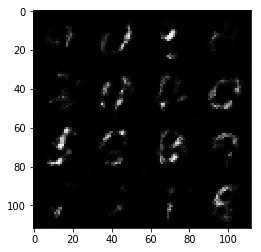

Epoch 1/2... Discriminator Loss: 0.9676... Generator Loss: 1.4206
Epoch 1/2... Discriminator Loss: 1.1005... Generator Loss: 1.5744
Epoch 1/2... Discriminator Loss: 0.9561... Generator Loss: 1.6474
Epoch 1/2... Discriminator Loss: 0.9689... Generator Loss: 1.3525
Epoch 1/2... Discriminator Loss: 1.1103... Generator Loss: 0.9067
Epoch 1/2... Discriminator Loss: 1.0171... Generator Loss: 1.3705
Epoch 1/2... Discriminator Loss: 1.4504... Generator Loss: 0.5797
Epoch 1/2... Discriminator Loss: 1.0571... Generator Loss: 1.8268
Epoch 1/2... Discriminator Loss: 1.6392... Generator Loss: 0.4946
Epoch 1/2... Discriminator Loss: 1.1279... Generator Loss: 1.6963


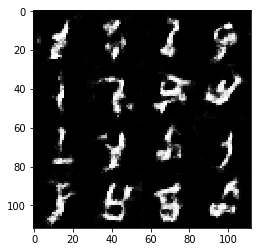

Epoch 1/2... Discriminator Loss: 1.0684... Generator Loss: 1.0966
Epoch 1/2... Discriminator Loss: 1.1361... Generator Loss: 0.9071
Epoch 1/2... Discriminator Loss: 1.4775... Generator Loss: 0.5709
Epoch 1/2... Discriminator Loss: 1.4203... Generator Loss: 0.6163
Epoch 1/2... Discriminator Loss: 1.1849... Generator Loss: 1.7120
Epoch 1/2... Discriminator Loss: 1.3829... Generator Loss: 0.6374
Epoch 1/2... Discriminator Loss: 1.1878... Generator Loss: 0.8318
Epoch 1/2... Discriminator Loss: 1.2946... Generator Loss: 0.7090
Epoch 1/2... Discriminator Loss: 1.2740... Generator Loss: 0.7171
Epoch 1/2... Discriminator Loss: 1.1191... Generator Loss: 1.0681


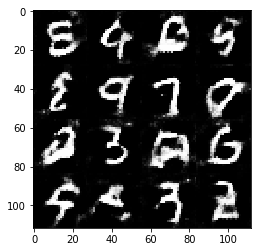

Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.2727
Epoch 1/2... Discriminator Loss: 1.1809... Generator Loss: 1.3147
Epoch 1/2... Discriminator Loss: 1.0969... Generator Loss: 0.9464
Epoch 1/2... Discriminator Loss: 1.6247... Generator Loss: 0.4664
Epoch 1/2... Discriminator Loss: 1.2402... Generator Loss: 0.7531
Epoch 1/2... Discriminator Loss: 1.1235... Generator Loss: 1.0397
Epoch 1/2... Discriminator Loss: 1.2411... Generator Loss: 0.7653
Epoch 1/2... Discriminator Loss: 1.1101... Generator Loss: 0.9748
Epoch 1/2... Discriminator Loss: 1.3532... Generator Loss: 2.1948
Epoch 1/2... Discriminator Loss: 1.1029... Generator Loss: 1.1457


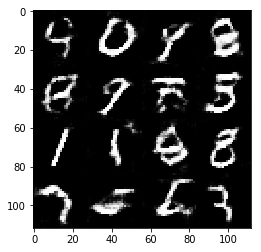

Epoch 1/2... Discriminator Loss: 1.0666... Generator Loss: 1.6194
Epoch 1/2... Discriminator Loss: 1.1509... Generator Loss: 0.9933
Epoch 1/2... Discriminator Loss: 1.2279... Generator Loss: 0.8301
Epoch 1/2... Discriminator Loss: 1.1411... Generator Loss: 0.8975
Epoch 1/2... Discriminator Loss: 1.2694... Generator Loss: 0.7703
Epoch 1/2... Discriminator Loss: 1.1822... Generator Loss: 0.9039
Epoch 1/2... Discriminator Loss: 1.0895... Generator Loss: 1.2672
Epoch 1/2... Discriminator Loss: 1.2464... Generator Loss: 0.8716
Epoch 1/2... Discriminator Loss: 1.0361... Generator Loss: 1.5015
Epoch 1/2... Discriminator Loss: 1.2839... Generator Loss: 2.0071


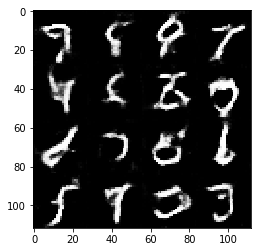

Epoch 1/2... Discriminator Loss: 1.1267... Generator Loss: 1.1987
Epoch 1/2... Discriminator Loss: 1.2704... Generator Loss: 0.7199
Epoch 1/2... Discriminator Loss: 1.1721... Generator Loss: 0.8214
Epoch 1/2... Discriminator Loss: 1.1519... Generator Loss: 1.5250
Epoch 1/2... Discriminator Loss: 1.2271... Generator Loss: 0.7643
Epoch 1/2... Discriminator Loss: 1.2170... Generator Loss: 1.7605
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 1.4496
Epoch 1/2... Discriminator Loss: 1.1113... Generator Loss: 1.2532
Epoch 1/2... Discriminator Loss: 1.1615... Generator Loss: 0.9528
Epoch 1/2... Discriminator Loss: 1.1590... Generator Loss: 0.9700


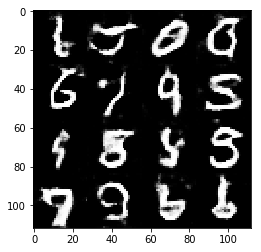

Epoch 1/2... Discriminator Loss: 1.0363... Generator Loss: 1.3219
Epoch 1/2... Discriminator Loss: 1.0470... Generator Loss: 1.5831
Epoch 1/2... Discriminator Loss: 1.1095... Generator Loss: 1.4397
Epoch 1/2... Discriminator Loss: 1.0818... Generator Loss: 1.2221
Epoch 1/2... Discriminator Loss: 1.2656... Generator Loss: 0.7907
Epoch 1/2... Discriminator Loss: 1.1118... Generator Loss: 0.9117
Epoch 1/2... Discriminator Loss: 1.2439... Generator Loss: 0.7526
Epoch 1/2... Discriminator Loss: 1.1250... Generator Loss: 1.5372
Epoch 1/2... Discriminator Loss: 1.0451... Generator Loss: 1.1483
Epoch 1/2... Discriminator Loss: 1.4597... Generator Loss: 0.5613


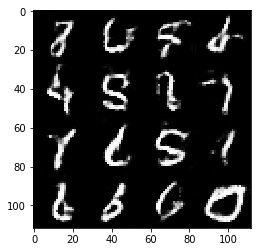

Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 0.8570
Epoch 1/2... Discriminator Loss: 1.1217... Generator Loss: 0.9258
Epoch 1/2... Discriminator Loss: 1.3891... Generator Loss: 0.6211
Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 0.9658
Epoch 1/2... Discriminator Loss: 1.1233... Generator Loss: 1.9243
Epoch 1/2... Discriminator Loss: 1.8365... Generator Loss: 2.5710
Epoch 1/2... Discriminator Loss: 1.0418... Generator Loss: 1.1856
Epoch 1/2... Discriminator Loss: 1.0401... Generator Loss: 1.1010
Epoch 1/2... Discriminator Loss: 1.3069... Generator Loss: 0.6957
Epoch 1/2... Discriminator Loss: 1.1178... Generator Loss: 1.3140


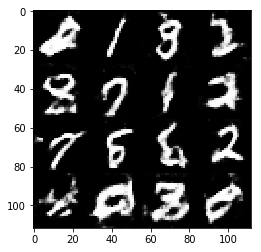

Epoch 1/2... Discriminator Loss: 1.4393... Generator Loss: 0.5897
Epoch 1/2... Discriminator Loss: 1.4002... Generator Loss: 0.5944
Epoch 1/2... Discriminator Loss: 1.4822... Generator Loss: 0.5500
Epoch 2/2... Discriminator Loss: 1.0287... Generator Loss: 1.3234
Epoch 2/2... Discriminator Loss: 2.1753... Generator Loss: 3.0949
Epoch 2/2... Discriminator Loss: 1.0692... Generator Loss: 1.0251
Epoch 2/2... Discriminator Loss: 1.1195... Generator Loss: 0.8850
Epoch 2/2... Discriminator Loss: 1.0070... Generator Loss: 1.4730
Epoch 2/2... Discriminator Loss: 1.1698... Generator Loss: 0.8444
Epoch 2/2... Discriminator Loss: 1.0377... Generator Loss: 1.1432


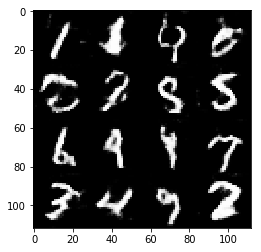

Epoch 2/2... Discriminator Loss: 0.9697... Generator Loss: 1.2494
Epoch 2/2... Discriminator Loss: 1.3319... Generator Loss: 0.6667
Epoch 2/2... Discriminator Loss: 1.4582... Generator Loss: 0.5619
Epoch 2/2... Discriminator Loss: 0.9985... Generator Loss: 1.3290
Epoch 2/2... Discriminator Loss: 1.0339... Generator Loss: 1.6492
Epoch 2/2... Discriminator Loss: 1.1013... Generator Loss: 1.0088
Epoch 2/2... Discriminator Loss: 1.1231... Generator Loss: 0.9596
Epoch 2/2... Discriminator Loss: 0.9456... Generator Loss: 1.5394
Epoch 2/2... Discriminator Loss: 1.0248... Generator Loss: 1.2949
Epoch 2/2... Discriminator Loss: 1.1044... Generator Loss: 1.2240


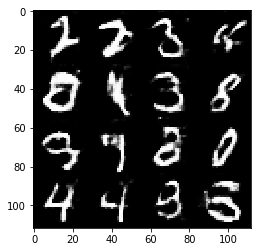

Epoch 2/2... Discriminator Loss: 2.0203... Generator Loss: 0.3078
Epoch 2/2... Discriminator Loss: 1.0054... Generator Loss: 1.3897
Epoch 2/2... Discriminator Loss: 1.0172... Generator Loss: 1.1224
Epoch 2/2... Discriminator Loss: 1.2712... Generator Loss: 1.8163
Epoch 2/2... Discriminator Loss: 1.0167... Generator Loss: 1.2584
Epoch 2/2... Discriminator Loss: 1.0472... Generator Loss: 1.0783
Epoch 2/2... Discriminator Loss: 1.1166... Generator Loss: 0.9464
Epoch 2/2... Discriminator Loss: 1.3795... Generator Loss: 1.7817
Epoch 2/2... Discriminator Loss: 1.1363... Generator Loss: 1.0046
Epoch 2/2... Discriminator Loss: 1.0780... Generator Loss: 1.2591


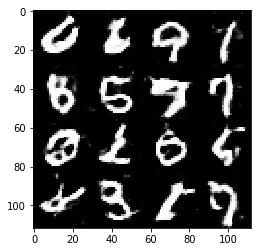

Epoch 2/2... Discriminator Loss: 1.0912... Generator Loss: 1.0722
Epoch 2/2... Discriminator Loss: 1.1009... Generator Loss: 1.0011
Epoch 2/2... Discriminator Loss: 1.1970... Generator Loss: 1.9313
Epoch 2/2... Discriminator Loss: 1.0442... Generator Loss: 1.1727
Epoch 2/2... Discriminator Loss: 1.3601... Generator Loss: 2.2436
Epoch 2/2... Discriminator Loss: 1.1760... Generator Loss: 0.8100
Epoch 2/2... Discriminator Loss: 1.2566... Generator Loss: 0.7391
Epoch 2/2... Discriminator Loss: 1.1275... Generator Loss: 1.1864
Epoch 2/2... Discriminator Loss: 1.2332... Generator Loss: 0.8206
Epoch 2/2... Discriminator Loss: 1.1521... Generator Loss: 0.8802


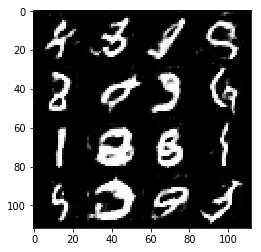

Epoch 2/2... Discriminator Loss: 1.2466... Generator Loss: 0.7245
Epoch 2/2... Discriminator Loss: 1.4433... Generator Loss: 0.5840
Epoch 2/2... Discriminator Loss: 1.1054... Generator Loss: 0.9027
Epoch 2/2... Discriminator Loss: 1.1551... Generator Loss: 0.8469
Epoch 2/2... Discriminator Loss: 1.1071... Generator Loss: 0.8975
Epoch 2/2... Discriminator Loss: 1.0789... Generator Loss: 1.1487
Epoch 2/2... Discriminator Loss: 0.9698... Generator Loss: 1.2356
Epoch 2/2... Discriminator Loss: 1.0745... Generator Loss: 0.9735
Epoch 2/2... Discriminator Loss: 0.9883... Generator Loss: 1.2950
Epoch 2/2... Discriminator Loss: 2.6901... Generator Loss: 3.8809


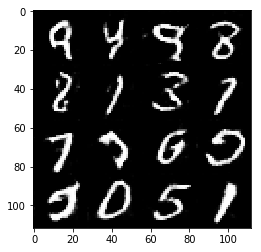

Epoch 2/2... Discriminator Loss: 0.9854... Generator Loss: 1.1585
Epoch 2/2... Discriminator Loss: 1.0296... Generator Loss: 1.0575
Epoch 2/2... Discriminator Loss: 0.9092... Generator Loss: 1.4437
Epoch 2/2... Discriminator Loss: 1.0101... Generator Loss: 1.1188
Epoch 2/2... Discriminator Loss: 0.9577... Generator Loss: 1.4421
Epoch 2/2... Discriminator Loss: 0.9309... Generator Loss: 1.8194
Epoch 2/2... Discriminator Loss: 0.9449... Generator Loss: 1.3655
Epoch 2/2... Discriminator Loss: 1.2954... Generator Loss: 0.7112
Epoch 2/2... Discriminator Loss: 1.0264... Generator Loss: 1.2113
Epoch 2/2... Discriminator Loss: 1.0007... Generator Loss: 1.0976


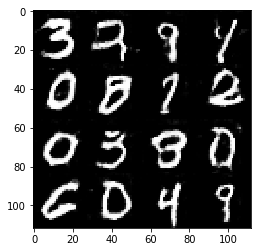

Epoch 2/2... Discriminator Loss: 1.1072... Generator Loss: 0.9133
Epoch 2/2... Discriminator Loss: 1.0897... Generator Loss: 1.1818
Epoch 2/2... Discriminator Loss: 3.1706... Generator Loss: 0.1287
Epoch 2/2... Discriminator Loss: 1.0464... Generator Loss: 1.2493
Epoch 2/2... Discriminator Loss: 0.9803... Generator Loss: 1.2276
Epoch 2/2... Discriminator Loss: 1.0318... Generator Loss: 1.0343
Epoch 2/2... Discriminator Loss: 1.0334... Generator Loss: 1.0552
Epoch 2/2... Discriminator Loss: 0.9873... Generator Loss: 1.7507
Epoch 2/2... Discriminator Loss: 1.2101... Generator Loss: 0.8573
Epoch 2/2... Discriminator Loss: 1.0109... Generator Loss: 1.2247


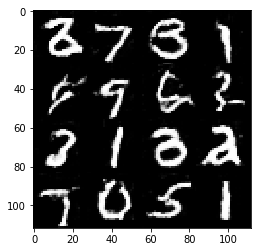

Epoch 2/2... Discriminator Loss: 1.0337... Generator Loss: 1.6255
Epoch 2/2... Discriminator Loss: 1.1278... Generator Loss: 0.9450
Epoch 2/2... Discriminator Loss: 0.9494... Generator Loss: 1.6716
Epoch 2/2... Discriminator Loss: 1.0947... Generator Loss: 1.5699
Epoch 2/2... Discriminator Loss: 1.0238... Generator Loss: 1.1039
Epoch 2/2... Discriminator Loss: 1.0682... Generator Loss: 0.9650
Epoch 2/2... Discriminator Loss: 1.0100... Generator Loss: 1.2061
Epoch 2/2... Discriminator Loss: 0.9722... Generator Loss: 1.5666
Epoch 2/2... Discriminator Loss: 1.2240... Generator Loss: 0.8523
Epoch 2/2... Discriminator Loss: 1.0381... Generator Loss: 1.3023


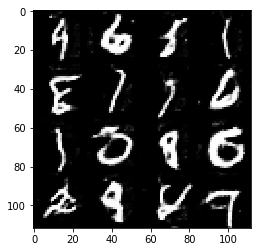

Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 0.9126
Epoch 2/2... Discriminator Loss: 0.9794... Generator Loss: 1.1541
Epoch 2/2... Discriminator Loss: 1.0691... Generator Loss: 1.0299
Epoch 2/2... Discriminator Loss: 1.2144... Generator Loss: 1.9260
Epoch 2/2... Discriminator Loss: 1.0477... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 1.1917... Generator Loss: 0.7766
Epoch 2/2... Discriminator Loss: 1.3211... Generator Loss: 0.7626
Epoch 2/2... Discriminator Loss: 0.9713... Generator Loss: 1.2178
Epoch 2/2... Discriminator Loss: 1.0688... Generator Loss: 0.9483
Epoch 2/2... Discriminator Loss: 0.9666... Generator Loss: 1.2953


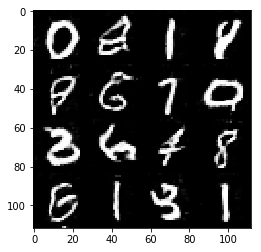

Epoch 2/2... Discriminator Loss: 0.9534... Generator Loss: 1.1449
Epoch 2/2... Discriminator Loss: 0.8600... Generator Loss: 1.3953
Epoch 2/2... Discriminator Loss: 0.9868... Generator Loss: 2.1510
Epoch 2/2... Discriminator Loss: 0.9869... Generator Loss: 1.0066
Epoch 2/2... Discriminator Loss: 1.0293... Generator Loss: 1.1482
Epoch 2/2... Discriminator Loss: 1.0633... Generator Loss: 1.1177
Epoch 2/2... Discriminator Loss: 1.1451... Generator Loss: 1.0307
*************


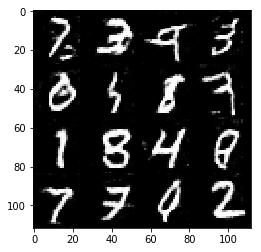

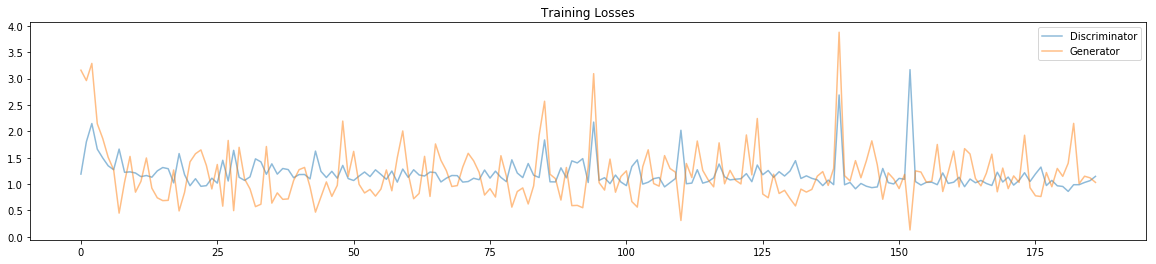

In [114]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 1.1485
Epoch 1/1... Discriminator Loss: 1.0399... Generator Loss: 1.3093
Epoch 1/1... Discriminator Loss: 2.4196... Generator Loss: 0.3961
Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 2.3601
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 0.6614... Generator Loss: 2.9529
Epoch 1/1... Discriminator Loss: 0.7090... Generator Loss: 2.1051
Epoch 1/1... Discriminator Loss: 0.6714... Generator Loss: 2.2579
Epoch 1/1... Discriminator Loss: 1.1436... Generator Loss: 1.1764


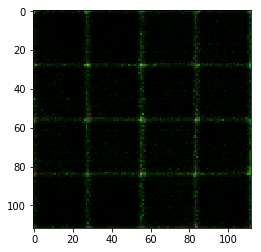

Epoch 1/1... Discriminator Loss: 0.6602... Generator Loss: 2.3993
Epoch 1/1... Discriminator Loss: 0.7447... Generator Loss: 2.1538
Epoch 1/1... Discriminator Loss: 0.6008... Generator Loss: 3.7809
Epoch 1/1... Discriminator Loss: 0.7224... Generator Loss: 2.0587
Epoch 1/1... Discriminator Loss: 0.6647... Generator Loss: 4.7605
Epoch 1/1... Discriminator Loss: 0.5825... Generator Loss: 3.2811
Epoch 1/1... Discriminator Loss: 0.6974... Generator Loss: 2.4366
Epoch 1/1... Discriminator Loss: 0.6121... Generator Loss: 3.6055
Epoch 1/1... Discriminator Loss: 0.6367... Generator Loss: 2.4761
Epoch 1/1... Discriminator Loss: 0.9998... Generator Loss: 1.3269


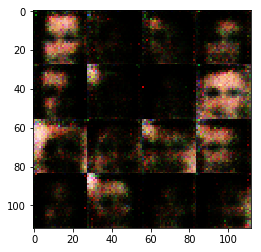

Epoch 1/1... Discriminator Loss: 0.8331... Generator Loss: 3.1296
Epoch 1/1... Discriminator Loss: 0.7241... Generator Loss: 1.9323
Epoch 1/1... Discriminator Loss: 0.8049... Generator Loss: 1.6783
Epoch 1/1... Discriminator Loss: 0.6216... Generator Loss: 2.6112
Epoch 1/1... Discriminator Loss: 0.8190... Generator Loss: 1.5023
Epoch 1/1... Discriminator Loss: 0.7508... Generator Loss: 2.0294
Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 3.2899
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.5311
Epoch 1/1... Discriminator Loss: 0.7725... Generator Loss: 1.8834
Epoch 1/1... Discriminator Loss: 0.7338... Generator Loss: 2.2067


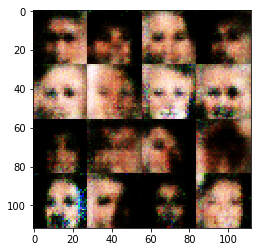

Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 3.9332
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.0538... Generator Loss: 1.1174
Epoch 1/1... Discriminator Loss: 0.8006... Generator Loss: 3.3039
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.8336
Epoch 1/1... Discriminator Loss: 0.8114... Generator Loss: 2.1094
Epoch 1/1... Discriminator Loss: 1.2103... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 0.8734... Generator Loss: 1.4464
Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 3.0088
Epoch 1/1... Discriminator Loss: 1.5454... Generator Loss: 0.6100


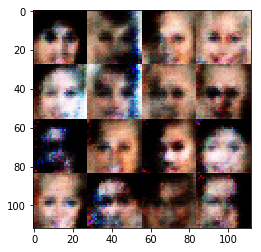

Epoch 1/1... Discriminator Loss: 0.8576... Generator Loss: 1.8159
Epoch 1/1... Discriminator Loss: 0.9637... Generator Loss: 2.5969
Epoch 1/1... Discriminator Loss: 1.0116... Generator Loss: 1.4369
Epoch 1/1... Discriminator Loss: 1.7486... Generator Loss: 0.5441
Epoch 1/1... Discriminator Loss: 0.9065... Generator Loss: 1.8176
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 1.5777
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 1.2233
Epoch 1/1... Discriminator Loss: 0.8397... Generator Loss: 2.0535
Epoch 1/1... Discriminator Loss: 1.0098... Generator Loss: 1.1414
Epoch 1/1... Discriminator Loss: 0.9479... Generator Loss: 1.8443


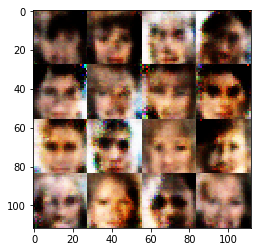

Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 1.7767
Epoch 1/1... Discriminator Loss: 1.1711... Generator Loss: 1.2589
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 1.1154
Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 1.0867
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 1.7809
Epoch 1/1... Discriminator Loss: 0.9857... Generator Loss: 1.5377
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 1.3238
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 2.1541
Epoch 1/1... Discriminator Loss: 1.1970... Generator Loss: 0.9762


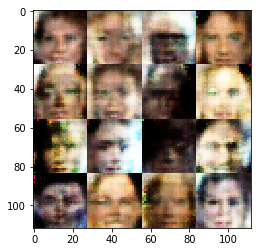

Epoch 1/1... Discriminator Loss: 1.1860... Generator Loss: 0.9930
Epoch 1/1... Discriminator Loss: 1.0800... Generator Loss: 1.1860
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 1.8664
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 2.1688
Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 0.8080
Epoch 1/1... Discriminator Loss: 0.9644... Generator Loss: 1.4549
Epoch 1/1... Discriminator Loss: 1.0513... Generator Loss: 1.3895
Epoch 1/1... Discriminator Loss: 1.0219... Generator Loss: 1.8285
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 2.2756


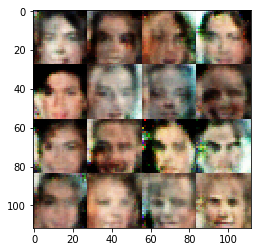

Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 1.0783
Epoch 1/1... Discriminator Loss: 1.0410... Generator Loss: 1.8345
Epoch 1/1... Discriminator Loss: 0.9853... Generator Loss: 1.6063
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 1.1890
Epoch 1/1... Discriminator Loss: 1.2331... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 1.3051
Epoch 1/1... Discriminator Loss: 1.1766... Generator Loss: 1.3093
Epoch 1/1... Discriminator Loss: 1.1310... Generator Loss: 1.1960
Epoch 1/1... Discriminator Loss: 1.5423... Generator Loss: 0.5562


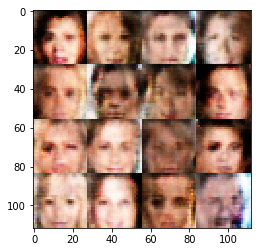

Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 1.5436
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.7395
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 1.0460
Epoch 1/1... Discriminator Loss: 1.2695... Generator Loss: 0.9890
Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 1.0119
Epoch 1/1... Discriminator Loss: 1.2213... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.5772
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.0762... Generator Loss: 1.2312
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.6319


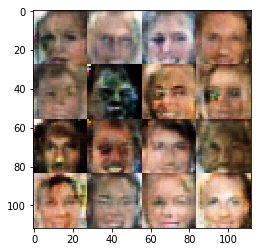

Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 1.3550
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 0.7996
Epoch 1/1... Discriminator Loss: 1.0915... Generator Loss: 1.1838
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 1.0048
Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 1.0913
Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.8605
Epoch 1/1... Discriminator Loss: 1.2352... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.1755... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.6935


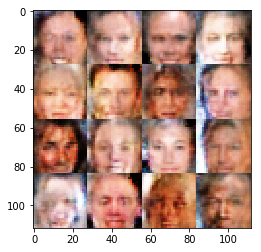

Epoch 1/1... Discriminator Loss: 1.5235... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.1977... Generator Loss: 1.0488
Epoch 1/1... Discriminator Loss: 1.2239... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.2014... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 1.6993
Epoch 1/1... Discriminator Loss: 1.2199... Generator Loss: 0.8752
Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 1.0190
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 1.1862
Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 1.5474


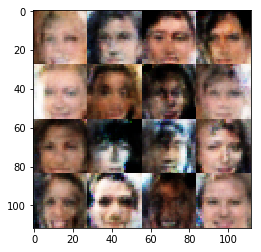

Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 0.9572
Epoch 1/1... Discriminator Loss: 1.2152... Generator Loss: 1.8713
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 0.9076
Epoch 1/1... Discriminator Loss: 1.0930... Generator Loss: 2.1782
Epoch 1/1... Discriminator Loss: 1.5608... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 1.4459
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 1.0462
Epoch 1/1... Discriminator Loss: 1.1407... Generator Loss: 1.2929
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.1404... Generator Loss: 0.8400


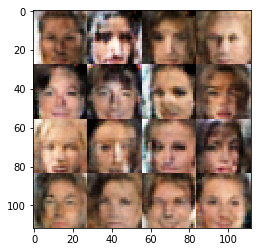

Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 1.2965
Epoch 1/1... Discriminator Loss: 1.0574... Generator Loss: 1.1412
Epoch 1/1... Discriminator Loss: 1.3534... Generator Loss: 0.7398
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.8992
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 0.7688
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 1.0816
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 1.2220
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.6695
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.8412


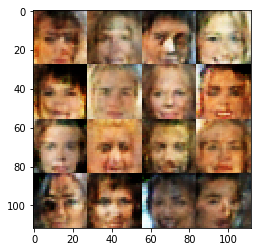

Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 1.1678
Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 0.9110
Epoch 1/1... Discriminator Loss: 1.4381... Generator Loss: 0.6390
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 1.2962
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 1.0268
Epoch 1/1... Discriminator Loss: 1.5974... Generator Loss: 0.4985
Epoch 1/1... Discriminator Loss: 1.1372... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.8388
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.8224


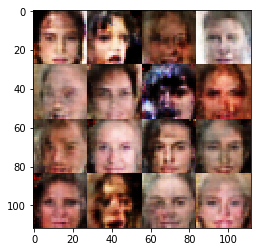

Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.7199
Epoch 1/1... Discriminator Loss: 1.3212... Generator Loss: 0.9909
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 1.3414
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.5653
Epoch 1/1... Discriminator Loss: 1.0871... Generator Loss: 1.0016
Epoch 1/1... Discriminator Loss: 1.3315... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 1.0334
Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 1.2212
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 0.9946


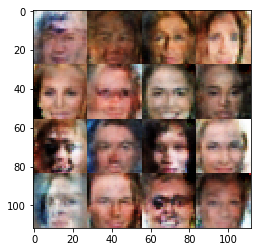

Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.9254
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.5748
Epoch 1/1... Discriminator Loss: 1.4884... Generator Loss: 0.5127
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.6189
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 1.1944
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.3892... Generator Loss: 0.6733


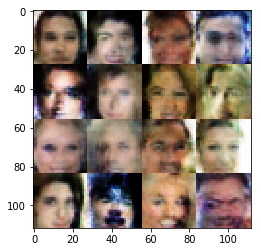

Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 1.2553
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 1.7062
Epoch 1/1... Discriminator Loss: 1.1656... Generator Loss: 1.4389
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.9711
Epoch 1/1... Discriminator Loss: 1.2045... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.9234
Epoch 1/1... Discriminator Loss: 1.1448... Generator Loss: 1.0690
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.8015
Epoch 1/1... Discriminator Loss: 1.2256... Generator Loss: 0.9382


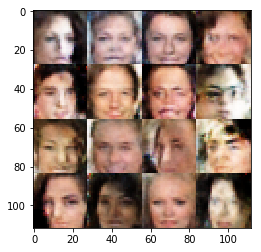

Epoch 1/1... Discriminator Loss: 1.1824... Generator Loss: 0.9017
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.7777
Epoch 1/1... Discriminator Loss: 1.2841... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 0.7905
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.6390
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.9593
Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 1.2087... Generator Loss: 1.0012
Epoch 1/1... Discriminator Loss: 1.0680... Generator Loss: 1.1673


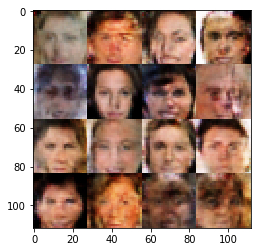

Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 1.2190
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 1.1858
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 1.4274... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.1525... Generator Loss: 1.0682
Epoch 1/1... Discriminator Loss: 1.7670... Generator Loss: 0.3893
Epoch 1/1... Discriminator Loss: 1.2223... Generator Loss: 1.1508
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.9219
Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 0.9890
Epoch 1/1... Discriminator Loss: 1.4777... Generator Loss: 0.5695


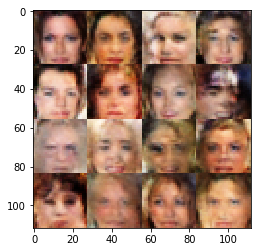

Epoch 1/1... Discriminator Loss: 1.1943... Generator Loss: 1.1152
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.8384
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.2307... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 1.2763... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 0.8942
Epoch 1/1... Discriminator Loss: 1.4583... Generator Loss: 0.5544
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 0.7293


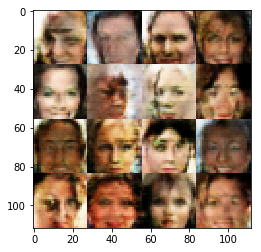

Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 1.0847
Epoch 1/1... Discriminator Loss: 1.2431... Generator Loss: 0.7507
Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.1664... Generator Loss: 1.3851
Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 1.1037... Generator Loss: 1.1198
Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.4186
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.8698
Epoch 1/1... Discriminator Loss: 1.2153... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.8129


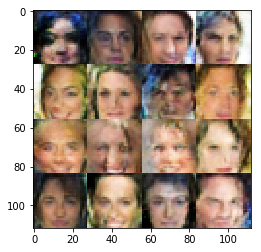

Epoch 1/1... Discriminator Loss: 0.9995... Generator Loss: 1.3036
Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.8571
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 1.0176
Epoch 1/1... Discriminator Loss: 1.3069... Generator Loss: 0.7604
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.8150
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.6410
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.7579


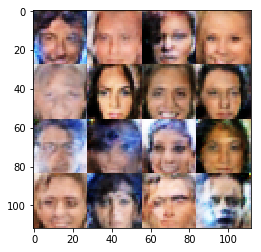

Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.6025
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.0926... Generator Loss: 0.9256
Epoch 1/1... Discriminator Loss: 1.1172... Generator Loss: 1.3930
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 0.7877
Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.5618... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 1.2715
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.9914
Epoch 1/1... Discriminator Loss: 1.4424... Generator Loss: 0.5987


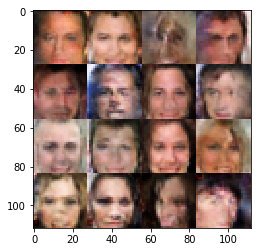

Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.9516
Epoch 1/1... Discriminator Loss: 1.2367... Generator Loss: 0.8340
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 1.2417
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.9595
Epoch 1/1... Discriminator Loss: 1.2126... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.9240
Epoch 1/1... Discriminator Loss: 1.1723... Generator Loss: 0.9382
Epoch 1/1... Discriminator Loss: 1.2217... Generator Loss: 0.8060
Epoch 1/1... Discriminator Loss: 1.4249... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.7243


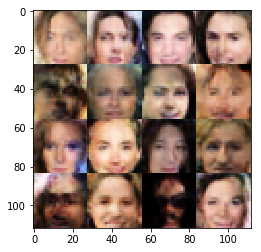

Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.1996... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.6223
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 1.0184
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 0.9441... Generator Loss: 1.5070
Epoch 1/1... Discriminator Loss: 1.2000... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 1.2959... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.2267... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 1.4312


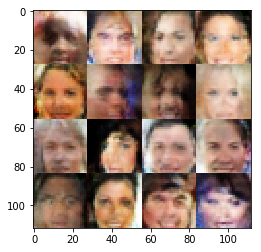

Epoch 1/1... Discriminator Loss: 1.0542... Generator Loss: 1.1395
Epoch 1/1... Discriminator Loss: 1.1591... Generator Loss: 0.9894
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.6255
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.5624
Epoch 1/1... Discriminator Loss: 1.2167... Generator Loss: 1.0015
Epoch 1/1... Discriminator Loss: 0.9683... Generator Loss: 1.2261
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 1.1551... Generator Loss: 1.3647
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.6388
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7710


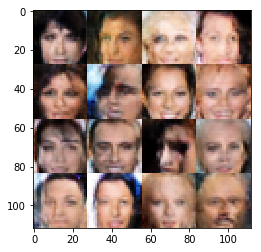

Epoch 1/1... Discriminator Loss: 1.6902... Generator Loss: 0.4017
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.4980
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 1.0994
Epoch 1/1... Discriminator Loss: 1.0276... Generator Loss: 1.0473
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.9491
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 1.0809
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 0.9463... Generator Loss: 1.4220
Epoch 1/1... Discriminator Loss: 1.2095... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.5106... Generator Loss: 0.5258


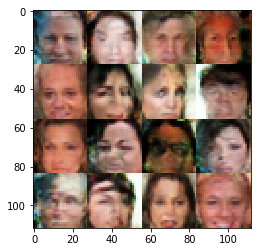

Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.7797
Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.8595
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.5295... Generator Loss: 0.6050


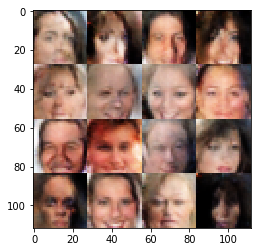

Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 0.8259
Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.2395... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.4900... Generator Loss: 0.5093
Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 1.8271


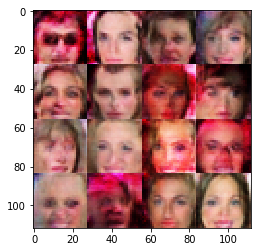

Epoch 1/1... Discriminator Loss: 1.3386... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.7249
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 1.0280
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.8433
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 0.9378
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 1.0745
Epoch 1/1... Discriminator Loss: 1.1645... Generator Loss: 0.9544
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.7343


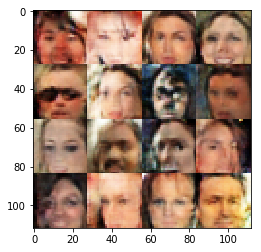

Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 0.9016
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.1796... Generator Loss: 0.8081
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 0.9432
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.1440... Generator Loss: 0.9386
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 1.0614
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.8579


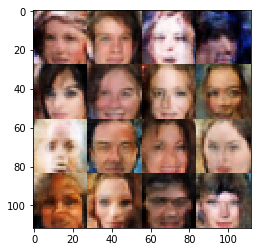

Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 0.9571
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 1.0057
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.2605... Generator Loss: 0.8059
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 1.1883
Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.8070
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7909
Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 1.1091


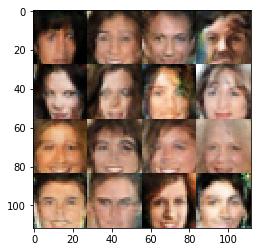

Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.8906
Epoch 1/1... Discriminator Loss: 1.1399... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 1.2127
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 1.3421
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.8619
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.9127


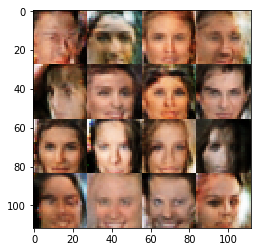

Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.7124
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.8585
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.7384
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.9610
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.2440... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 1.4602... Generator Loss: 0.5664
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.6933
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.9277


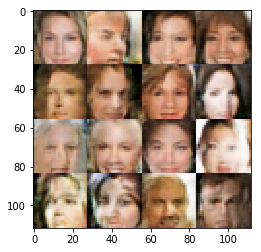

Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.8935
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.8602
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 1.0270
Epoch 1/1... Discriminator Loss: 1.4258... Generator Loss: 0.5704
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 1.0382
Epoch 1/1... Discriminator Loss: 1.2129... Generator Loss: 0.9080
Epoch 1/1... Discriminator Loss: 1.3194... Generator Loss: 0.8751
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 0.8303
Epoch 1/1... Discriminator Loss: 1.2518... Generator Loss: 0.8969


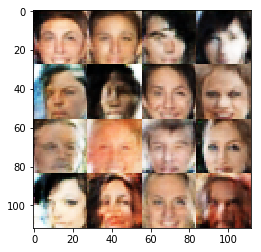

Epoch 1/1... Discriminator Loss: 1.2534... Generator Loss: 0.8892
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.9530
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 1.0200
Epoch 1/1... Discriminator Loss: 1.4995... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.9419
Epoch 1/1... Discriminator Loss: 1.2170... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 1.0763


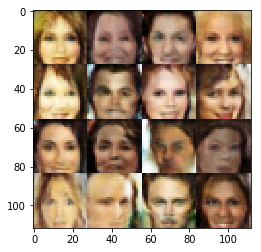

Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.9958
Epoch 1/1... Discriminator Loss: 1.0852... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.2829... Generator Loss: 0.9359
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.2798... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 1.2137... Generator Loss: 0.9918
Epoch 1/1... Discriminator Loss: 1.1711... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.6599
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.7600


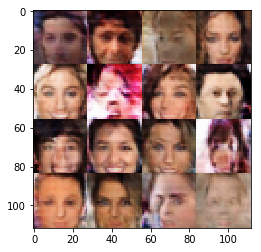

Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.8725
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.9082
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 1.0019
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.6861
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.8034
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.9485
Epoch 1/1... Discriminator Loss: 1.1049... Generator Loss: 0.9900
Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.7589
Epoch 1/1... Discriminator Loss: 1.6384... Generator Loss: 0.4704


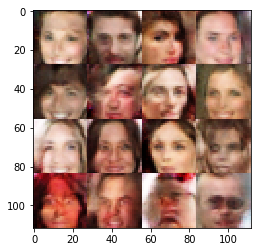

Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 1.0981
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.2104... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.8044
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 0.9486
Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.9685
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 1.0681
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.9823


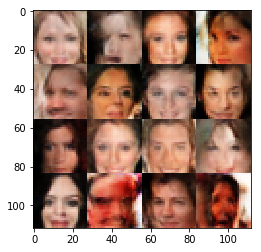

Epoch 1/1... Discriminator Loss: 1.1783... Generator Loss: 1.1590
Epoch 1/1... Discriminator Loss: 1.2942... Generator Loss: 0.8936
Epoch 1/1... Discriminator Loss: 1.1919... Generator Loss: 1.1250
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.8435
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.8465
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.8486
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.3864... Generator Loss: 0.6307
Epoch 1/1... Discriminator Loss: 1.5678... Generator Loss: 0.5756
Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.7291


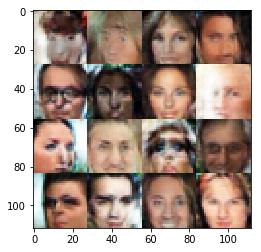

Epoch 1/1... Discriminator Loss: 1.5061... Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 1.0037
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.7490
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.8112
Epoch 1/1... Discriminator Loss: 1.5661... Generator Loss: 0.5782
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 1.2233... Generator Loss: 1.0225
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.8806
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.8361


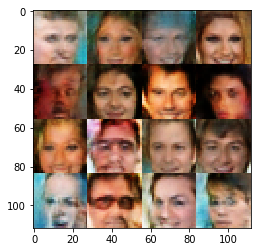

Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.9545
Epoch 1/1... Discriminator Loss: 1.3069... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 1.0353
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.7409
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.7841
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.7095


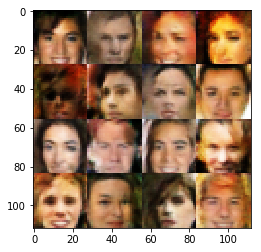

Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.8549
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.8434
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.6377
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 1.2941
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 1.2154
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.9634


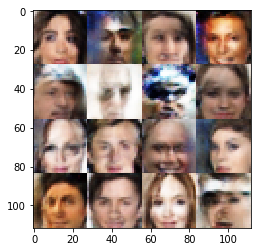

Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 1.0506
Epoch 1/1... Discriminator Loss: 1.1223... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.0771... Generator Loss: 1.1939
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 0.8835
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.8207
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 1.2453... Generator Loss: 0.8859
Epoch 1/1... Discriminator Loss: 1.2625... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.8834


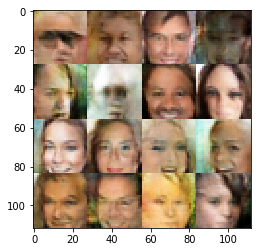

Epoch 1/1... Discriminator Loss: 1.4746... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 1.2225... Generator Loss: 0.9436
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 1.0321
Epoch 1/1... Discriminator Loss: 1.4586... Generator Loss: 0.6197
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.8139
Epoch 1/1... Discriminator Loss: 1.3897... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.8648
Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.7656


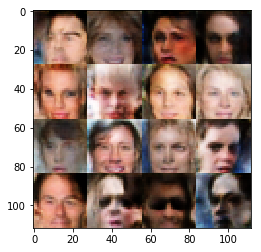

Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 1.1838
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 1.2454
Epoch 1/1... Discriminator Loss: 1.4217... Generator Loss: 0.9358
Epoch 1/1... Discriminator Loss: 1.0618... Generator Loss: 1.0335
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.8299
Epoch 1/1... Discriminator Loss: 1.3315... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.2942... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.8722


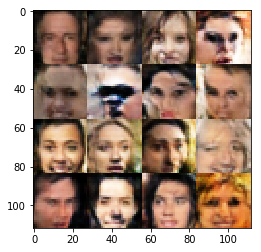

Epoch 1/1... Discriminator Loss: 1.1577... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 0.7965
Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 0.8181
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 0.7333
Epoch 1/1... Discriminator Loss: 1.1734... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.8931
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.8469
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.8589


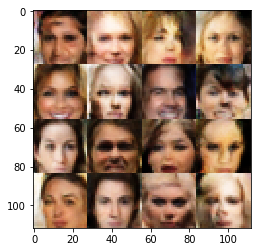

Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 1.0043
Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 1.1424
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.9909
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.8265
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 0.8735
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.8815


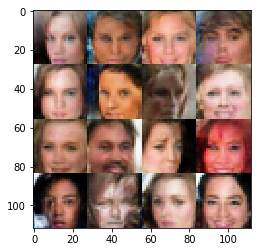

Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.7117
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.1762... Generator Loss: 0.9436
Epoch 1/1... Discriminator Loss: 1.2902... Generator Loss: 0.7829
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.8743
Epoch 1/1... Discriminator Loss: 1.4438... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.9150
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.7897


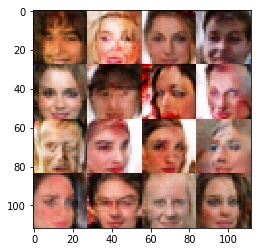

Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 0.8672
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 1.0957
Epoch 1/1... Discriminator Loss: 1.3912... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.2682... Generator Loss: 0.8673
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 1.0686
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 0.9357
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7594
Epoch 1/1... Discriminator Loss: 1.5855... Generator Loss: 0.5852


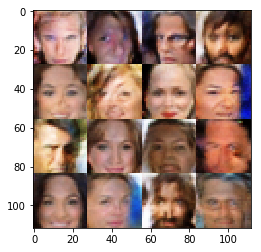

Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.7754
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 0.9684
Epoch 1/1... Discriminator Loss: 1.2108... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.8787
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 0.8840
Epoch 1/1... Discriminator Loss: 1.0583... Generator Loss: 1.1545
Epoch 1/1... Discriminator Loss: 1.2511... Generator Loss: 1.1114
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 0.8906
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.6682


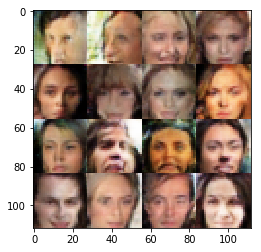

Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.6411
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.7490
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.8906
Epoch 1/1... Discriminator Loss: 1.3447... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.7841
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 0.9330


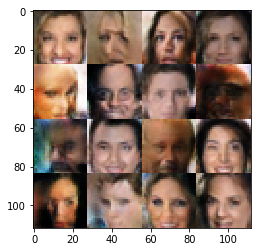

Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.8735
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 1.0356... Generator Loss: 1.3703
Epoch 1/1... Discriminator Loss: 1.2267... Generator Loss: 0.8270
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 1.2147


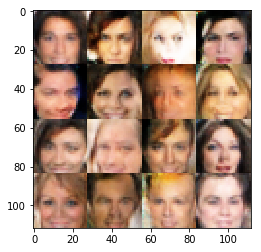

Epoch 1/1... Discriminator Loss: 1.1990... Generator Loss: 0.9274
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.8013
Epoch 1/1... Discriminator Loss: 1.3767... Generator Loss: 0.6818
Epoch 1/1... Discriminator Loss: 1.5091... Generator Loss: 0.5024
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.8454
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.6744


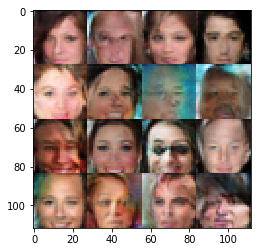

Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.8292
Epoch 1/1... Discriminator Loss: 1.2334... Generator Loss: 0.8604
Epoch 1/1... Discriminator Loss: 1.4744... Generator Loss: 0.5760
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.8024
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.8697
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.8501
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.5273... Generator Loss: 0.6587


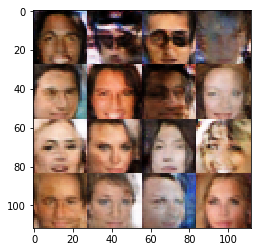

Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.9750
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 0.8009
Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.2600... Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 1.1729... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 1.2880... Generator Loss: 0.8174
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.8696


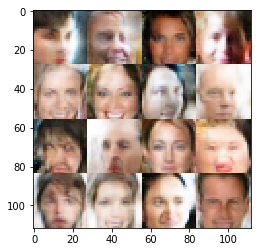

Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.9213
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 0.9352
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 1.2299
Epoch 1/1... Discriminator Loss: 1.2107... Generator Loss: 0.9519
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.8058
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.7110
Epoch 1/1... Discriminator Loss: 1.2106... Generator Loss: 0.9423
Epoch 1/1... Discriminator Loss: 1.4909... Generator Loss: 0.7074


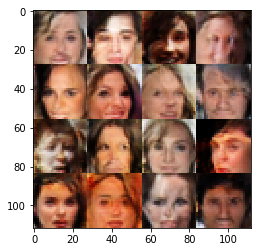

Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 1.0626
Epoch 1/1... Discriminator Loss: 1.1231... Generator Loss: 0.9778
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.7704
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.2056... Generator Loss: 0.9405
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.9774
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.7449


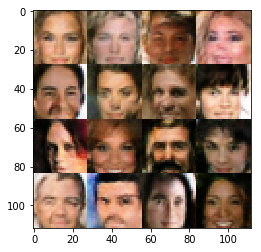

Epoch 1/1... Discriminator Loss: 1.2635... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.9051
Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 1.0042
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.6063
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.5615
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.9825
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.9225


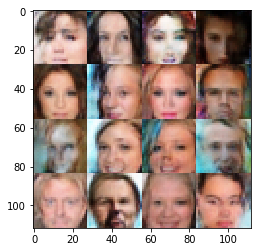

Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8051
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.4686... Generator Loss: 0.5676
Epoch 1/1... Discriminator Loss: 1.1733... Generator Loss: 1.4276
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.8678
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.2252... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.2654... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.9613


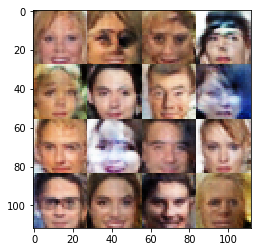

Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.8402
Epoch 1/1... Discriminator Loss: 1.5678... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 1.2163... Generator Loss: 0.9553
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.8805
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 1.0960


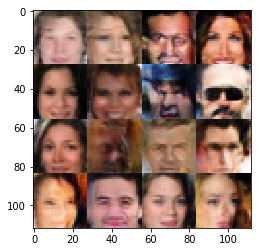

Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.7529
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.9354
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.8405
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.7627
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.8732
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.8053
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 0.8532


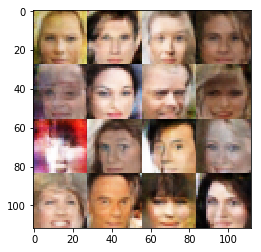

Epoch 1/1... Discriminator Loss: 1.0800... Generator Loss: 1.1856
Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 0.9709
Epoch 1/1... Discriminator Loss: 1.4722... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.2570... Generator Loss: 0.8269
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7425
Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 0.9419
Epoch 1/1... Discriminator Loss: 1.1719... Generator Loss: 0.9803
Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 0.8531


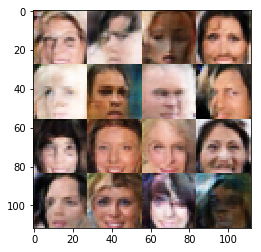

Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.9447
*************


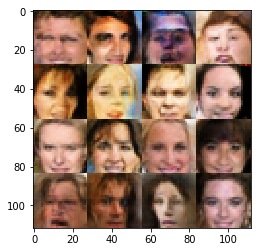

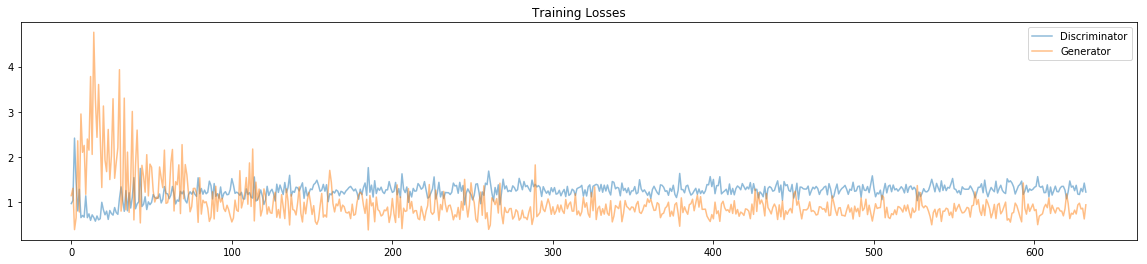

In [116]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.